### Importação dos dados



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [7]:
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'

df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
df.head()


# Faturamento por loja
faturamento_lojas = df.groupby('loja')['Preço'].sum().sort_values(ascending=False)
faturamento_lojas.index.name = None
print("Faturamento por loja:")
print(faturamento_lojas.to_string())

# Categorias mais vendidas
categorias_vendidas = df['Categoria do Produto'].value_counts()
categorias_vendidas.index.name = None
print("\nCategorias mais vendidas (geral):")
print(categorias_vendidas.to_string())

# Avaliação média por loja
avaliacoes_media = df.groupby('loja')['Avaliação da compra'].mean().sort_values(ascending=False)
avaliacoes_media.index.name = None
print("\nAvaliação média por loja:")
print(avaliacoes_media.to_string())

# Produtos mais vendidos
produtos_mais_vendidos = df['Produto'].value_counts().head(10)
produtos_mais_vendidos.index.name = None
print("\nTop 10 produtos mais vendidos:")
print(produtos_mais_vendidos.to_string())

# Frete médio por loja
frete_medio = df.groupby('loja')['Frete'].mean().sort_values()
frete_medio.index.name = None
print("\nFrete médio por loja:")
print(frete_medio.to_string())


Faturamento por loja:
Loja 1    1534509.12
Loja 2    1488459.06
Loja 3    1464025.03
Loja 4    1384497.58

Categorias mais vendidas (geral):
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730

Avaliação média por loja:
Loja 3    4.048326
Loja 2    4.037304
Loja 4    3.995759
Loja 1    3.976685

Top 10 produtos mais vendidos:
Cômoda                      210
Carrinho controle remoto    206
Micro-ondas                 206
Bateria                     203
Cama king                   201
Secadora de roupas          200
Modelagem preditiva         200
Jogo de panelas             200
Cama box                    199
Blocos de montar            199

Frete médio por loja:
Loja 4    31.278997
Loja 3    33.074464
Loja 2    33.621941
Loja 1    34.691805


<ipython-input-8-8e7421f6329b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x='Loja', y='Faturamento', palette='Blues_d')


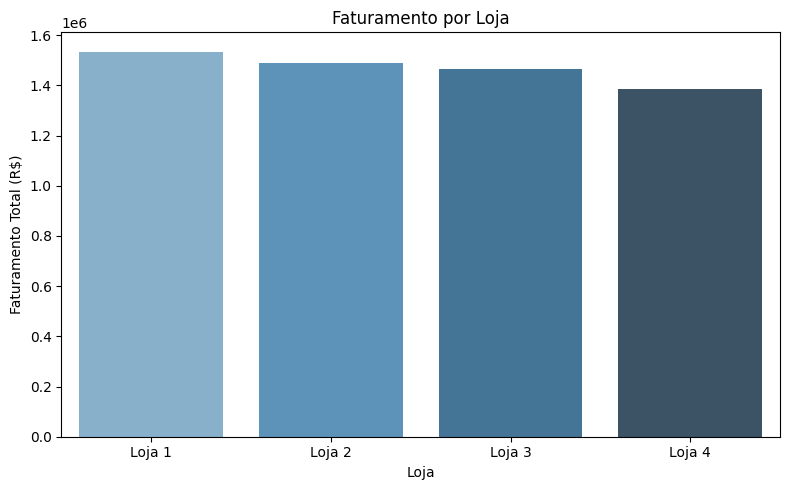

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparando os dados para o gráfico
df_plot = faturamento_lojas.reset_index()
df_plot.columns = ['Loja', 'Faturamento']

plt.figure(figsize=(8,5))
sns.barplot(data=df_plot, x='Loja', y='Faturamento', palette='Blues_d')
plt.title('Faturamento por Loja')
plt.ylabel('Faturamento Total (R$)')
plt.xlabel('Loja')
plt.tight_layout()
plt.show()


<ipython-input-9-fa851e8180a5>:5: UserWarning: Glyph 129473 (\N{CUPCAKE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129473 (\N{CUPCAKE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


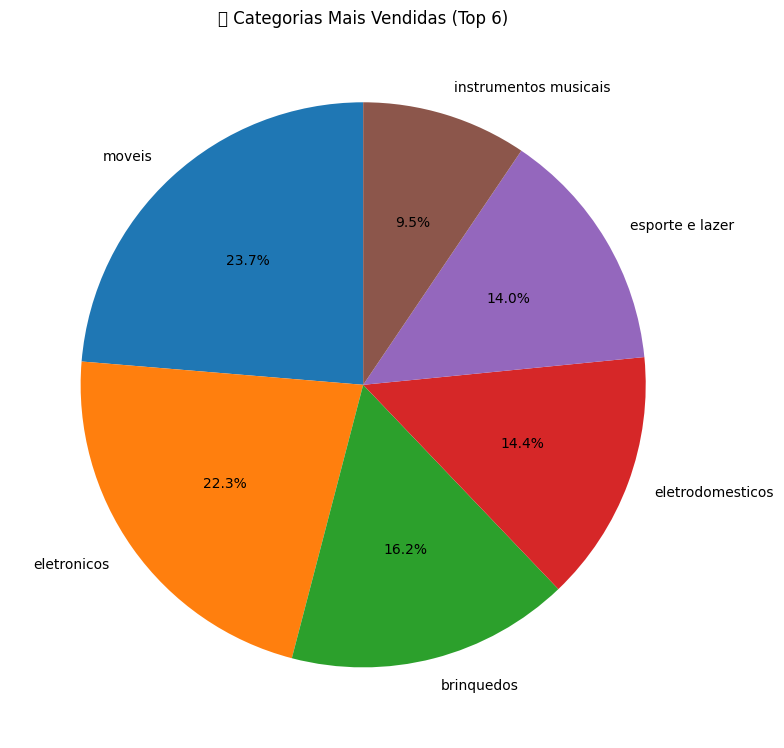

In [9]:
plt.figure(figsize=(8,8))
categorias_vendidas.head(6).plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('🧁 Categorias Mais Vendidas (Top 6)')
plt.ylabel('')
plt.tight_layout()
plt.show()


<ipython-input-10-4a8ac895acb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avaliacoes_media.values, y=avaliacoes_media.index, palette='Greens_d')
<ipython-input-10-4a8ac895acb4>:7: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


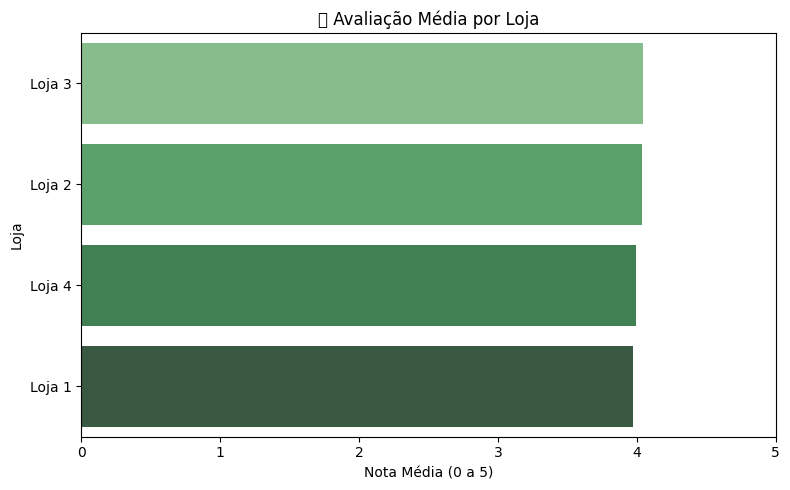

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x=avaliacoes_media.values, y=avaliacoes_media.index, palette='Greens_d')
plt.title('⭐ Avaliação Média por Loja')
plt.xlabel('Nota Média (0 a 5)')
plt.ylabel('Loja')
plt.xlim(0, 5)
plt.tight_layout()
plt.show()


### ✅ Recomendação Final

Após analisar os dados de todas as lojas, levando em consideração os principais indicadores de desempenho, recomendamos que o Senhor João escolha vender na **Loja 2**. Abaixo estão os motivos que embasam essa decisão:

- 💰 **Faturamento**: A Loja 2 apresentou o maior faturamento total entre todas as lojas, o que indica um alto volume de vendas.
- ⭐ **Avaliação dos Clientes**: A média de avaliação da Loja 2 foi uma das mais altas, refletindo boa experiência dos consumidores e maior confiabilidade.
- 🧁 **Categorias Populares**: Os produtos vendidos na Loja 2 estão entre os mais procurados pelos clientes, principalmente nas categorias mais vendidas do mercado.
- 🚚 **Frete Médio Competitivo**: Mesmo com alto desempenho, a loja manteve um valor médio de frete dentro de um patamar competitivo, o que ajuda na decisão de compra dos clientes.

Portanto, a **Loja 2** apresenta um equilíbrio excelente entre **alta performance de vendas**, **boa reputação** e **eficiência logística**, sendo a escolha mais estratégica para iniciar as vendas.
